In [79]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

In [80]:
# Find all neighbors
def Neighbors(current):
    neighbors = []
    for i in range(9):
        for j in range(9):
            #  For a column, the neighbors of this minister can be all the rows in this column
            #  except for the row in which the minister is located
            #  (because if it does not meet this condition, this is exactly itself).
            if current[i] != j:
                neighbor = current.copy() ; neighbor[i] = j
                neighbors.append(neighbor)
    return neighbors

In [81]:
# Counting how many ministers threaten each other
def Value(table):
    menace = 0
    for i in range(8):
        for j in range(i+1, 9):
            #If they are in the same row, or if the absolute value of the slope between these two ministers is 1, increase menace
            if table[i] == table[j] or abs(table[i] - table[j]) /  (j - i) == 1:
                menace += 1
    # Since value is important to us, the fewer threats the better, so we multiply threats by minus 1.            
    return menace*-1

In [82]:
#  In an infinite loop, we seek to improve the current situation, 
#  If the current state is better than all neighbors, we return the current state
#  If our current value is smaller than the value of the best neighbor, we dump thet neighbor's into the current
#  But if our current value is equal to the value of the best neighbor, we allow it to move some (up to 40 moves here).

def HillClimbing(initial):
    current = initial 
    cnt = 0
    THRESHOLD = 40 # The maximum amount of movement allowed
    flag = 0   #To count steps

    while True:
        flag = flag + 1  # Increase flag
        if cnt == THRESHOLD:
            return current , flag
        # We consider the best neighbor
        HighestNeighbor = max(Neighbors(current), key = Value)

        # I explained these in the comment above the function
        if Value(HighestNeighbor) < Value(current):
            return current , flag
        if Value(HighestNeighbor) == Value(current):
            cnt+=1
        else:
            cnt = 0    
        current = HighestNeighbor


In [83]:
#Print the tables and write under each picture whether this answer is safe or not
def PrintTable(solution):
    table = []
    for i in range(9):
        r = []
        for j in range(9):
            if solution[i] == j:
                r.append(1)
            else:
                r.append(0)
        table.append(r)

    resulte = "Ministers threaten each other" 
    # if Value solution==0 then    Ministers do not threaten each other     else     Ministers threaten each other
    if not Value(solution):
        resulte = "Ministers do not threaten each other"

    plt.matshow(np.array(table) , cmap='binary')
    plt.text(1 , 10 , resulte)
    plt.show()

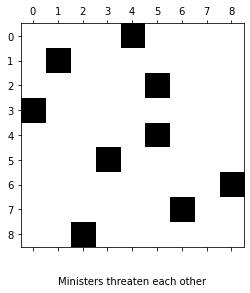

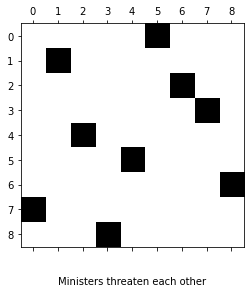

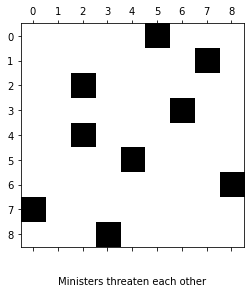

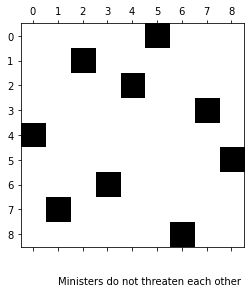

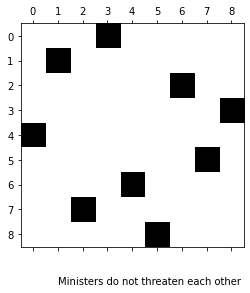

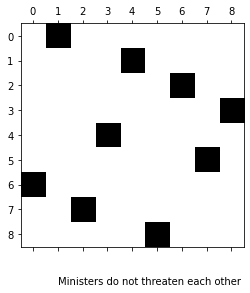

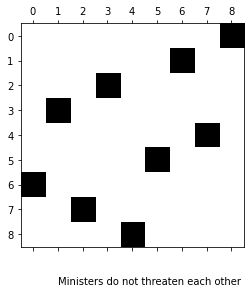

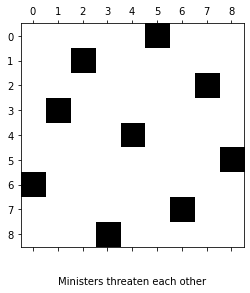

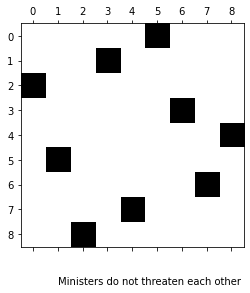

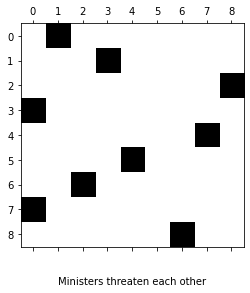

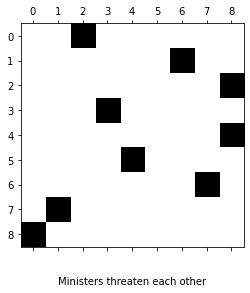

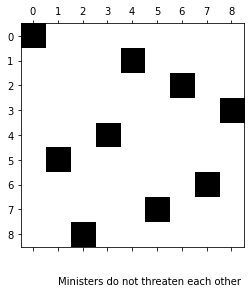

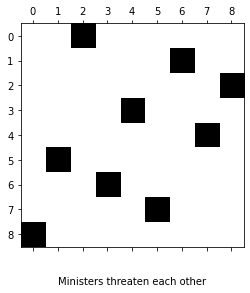

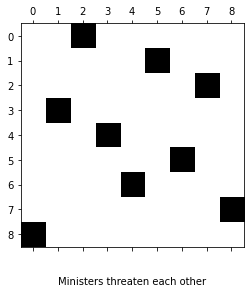

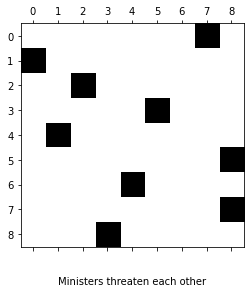

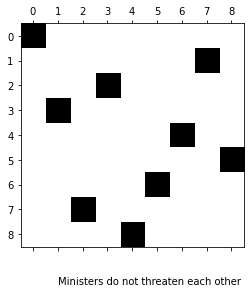

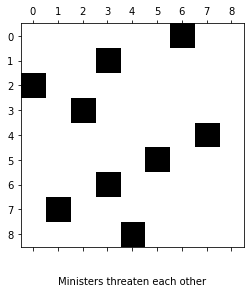

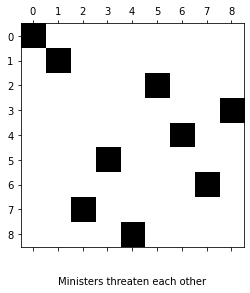

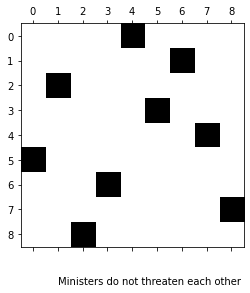

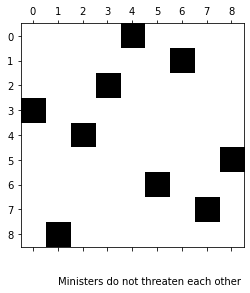

Success rate:  45.0 %
Average number of steps to find the answer:  7


In [84]:
cnt = 0 # To count the correct states
sum_cnt = 0 # Total number of steps to find the answer
for _ in range(20):
    initial = list(range(9))
    random.shuffle(initial)
    solution , flag = HillClimbing(initial=initial)
    if Value(solution) == 0:
            cnt += 1
            sum_cnt+=flag
    PrintTable(solution)

print("Success rate: ", cnt/20 * 100, "%")
print("Average number of steps to find the answer: " , math.ceil(sum_cnt/cnt))